In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime, date
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
import akshare as ak
# import tushare as ts
# ts.set_token('你自己的token')
# pro = ts.pro_api()
# import efinance as ef
# import baostock as bs
import tqdm
import scipy
import seaborn as sns

In [2]:
start_date=(date.today() - timedelta(days=3650)).strftime("%Y%m%d")
end_date=time.strftime("%Y%m%d",time.localtime())
# get_zs_price_day_sh('000001',start_date,end_date)
print(start_date,end_date)

20130619 20230617


# 均线择时方法

In [3]:
df_index=ak.stock_index_pe_lg(symbol='沪深300')#[['日期','指数']]
df_index

,日期,指数,等权静态市盈率,静态市盈率,静态市盈率中位数,等权滚动市盈率,滚动市盈率,滚动市盈率中位数
0,2005-04-08,1003.45,33.19,15.68,21.17,30.39,14.98,20.65
1,2005-04-11,995.42,33.43,15.76,21.40,29.77,15.12,20.65
2,2005-04-12,978.70,32.45,15.21,20.85,29.03,14.75,20.30
3,2005-04-13,1000.90,32.99,15.59,21.45,29.53,15.12,20.78
4,2005-04-14,986.98,32.23,15.42,21.14,28.95,14.99,20.56
...,...,...,...,...,...,...,...,...
4418,2023-06-12,3844.43,30.24,11.32,21.50,28.22,11.10,21.24
4419,2023-06-13,3864.91,29.59,11.35,21.78,28.45,11.12,21.32
4420,2023-06-14,3864.02,29.66,11.31,21.84,28.50,11.08,21.31
4421,2023-06-15,3925.50,30.05,11.45,22.32,28.88,11.22,21.58


In [4]:
df_index['MA5'] = df_index['指数'].rolling(window=5).mean()
df_index['MA10'] = df_index['指数'].rolling(window=10).mean()
df_index['MA20'] = df_index['指数'].rolling(window=20).mean()
df_index['MA60'] = df_index['指数'].rolling(window=60).mean()
df_index

,日期,指数,等权静态市盈率,静态市盈率,静态市盈率中位数,等权滚动市盈率,滚动市盈率,滚动市盈率中位数,MA5,MA10,MA20,MA60
0,2005-04-08,1003.45,33.19,15.68,21.17,30.39,14.98,20.65,NaN,NaN,NaN,NaN
1,2005-04-11,995.42,33.43,15.76,21.40,29.77,15.12,20.65,NaN,NaN,NaN,NaN
2,2005-04-12,978.70,32.45,15.21,20.85,29.03,14.75,20.30,NaN,NaN,NaN,NaN
3,2005-04-13,1000.90,32.99,15.59,21.45,29.53,15.12,20.78,NaN,NaN,NaN,NaN
4,2005-04-14,986.98,32.23,15.42,21.14,28.95,14.99,20.56,993.090,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4418,2023-06-12,3844.43,30.24,11.32,21.50,28.22,11.10,21.24,3819.764,3824.806,3868.2025,3979.764000
4419,2023-06-13,3864.91,29.59,11.35,21.78,28.45,11.12,21.32,3831.114,3827.522,3862.5375,3977.730833
4420,2023-06-14,3864.02,29.66,11.31,21.84,28.50,11.08,21.31,3846.050,3834.070,3857.7300,3976.478667
4421,2023-06-15,3925.50,30.05,11.45,22.32,28.88,11.22,21.58,3867.112,3845.933,3856.2015,3975.923333


In [5]:
MAa='MA5'
MAb='MA20'

In [6]:
df_index['chance']=0
for i in tqdm.trange(len(df_index)-1):
    if (df_index.iloc[i][MAa]<df_index.iloc[i][MAb] and df_index.iloc[i+1][MAa]>df_index.iloc[i+1][MAb]):
        df_index.loc[i+1,'chance']=1
    elif (df_index.iloc[i][MAa]>df_index.iloc[i][MAb] and df_index.iloc[i+1][MAa]<df_index.iloc[i+1][MAb]):
        df_index.loc[i+1,'chance']=-1
    else:
        pass
df_index=df_index[['日期','指数',MAa,MAb,'chance']]
df_index

100%|██████████| 4422/4422 [00:03<00:00, 1289.16it/s]


,日期,指数,MA5,MA20,chance
0,2005-04-08,1003.45,NaN,NaN,0
1,2005-04-11,995.42,NaN,NaN,0
2,2005-04-12,978.70,NaN,NaN,0
3,2005-04-13,1000.90,NaN,NaN,0
4,2005-04-14,986.98,993.090,NaN,0
...,...,...,...,...,...
4418,2023-06-12,3844.43,3819.764,3868.2025,0
4419,2023-06-13,3864.91,3831.114,3862.5375,0
4420,2023-06-14,3864.02,3846.050,3857.7300,0
4421,2023-06-15,3925.50,3867.112,3856.2015,1


In [7]:
# 只保留达到阈值的行
df_index_new=df_index[(df_index['chance'] < 0) | (df_index['chance'] > 0)]
df_index_new=df_index_new.reset_index(drop=True)
df_index_new

,日期,指数,MA5,MA20,chance
0,2005-06-10,894.56,877.842,864.4330,1
1,2005-07-04,855.93,879.346,888.0425,-1
2,2005-07-26,876.48,855.932,851.0240,1
3,2005-08-29,917.37,925.962,929.6060,-1
4,2005-09-05,952.72,937.590,935.5740,1
...,...,...,...,...,...
248,2023-03-06,4109.01,4110.740,4104.7560,1
249,2023-03-08,4034.11,4088.052,4100.3855,-1
250,2023-03-29,4006.14,4016.854,4015.5340,1
251,2023-04-25,3962.67,4043.092,4074.9405,-1


In [8]:
df_index_new['收益'] = np.nan
df_index_new['收益率'] = np.nan
# 只有所有日期都存在才可以使用（速度原因）
# df_index_new['日均收益率'] = np.nan
# 只有所有日期都存在才可以使用（速度原因）
for i in tqdm.trange(len(df_index_new)):
    for j in range(i+1,len(df_index_new)):
        x=df_index_new['chance'].iloc[i]
        y=df_index_new['chance'].iloc[j]
        if (x<0 and y>0) or (x>0 and y<0):
            df_index_new['收益'].iloc[i]=df_index_new['指数'].iloc[j]-df_index_new['指数'].iloc[i]
            df_index_new['收益率'].iloc[i]=100*(df_index_new['指数'].iloc[j]-df_index_new['指数'].iloc[i])/df_index_new['指数'].iloc[i]
            break
        else:
            pass
df_index_new

  0%|          | 0/253 [00:00<?, ?it/s]D:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|██████████| 253/253 [00:00<00:00, 2979.11it/s]


,日期,指数,MA5,MA20,chance,收益,收益率
0,2005-06-10,894.56,877.842,864.4330,1,-38.63,-4.318324
1,2005-07-04,855.93,879.346,888.0425,-1,20.55,2.400897
2,2005-07-26,876.48,855.932,851.0240,1,40.89,4.665252
3,2005-08-29,917.37,925.962,929.6060,-1,35.35,3.853407
4,2005-09-05,952.72,937.590,935.5740,1,-36.57,-3.838483
...,...,...,...,...,...,...,...
248,2023-03-06,4109.01,4110.740,4104.7560,1,-74.90,-1.822824
249,2023-03-08,4034.11,4088.052,4100.3855,-1,-27.97,-0.693338
250,2023-03-29,4006.14,4016.854,4015.5340,1,-43.47,-1.085084
251,2023-04-25,3962.67,4043.092,4074.9405,-1,-37.17,-0.938004


In [9]:
df_index['收益'] = np.nan
df_index['收益率'] = np.nan
# 只有所有日期都存在才可以使用（速度原因）
df_index['日均收益率'] = np.nan
# 只有所有日期都存在才可以使用（速度原因）
for i in tqdm.trange(len(df_index)-1):
    # 判断是否缺失
    if df_index[MAb].iloc[i]>-100:
        if df_index['chance'].iloc[i]==1: #1
            for j in range(i+1,len(df_index)):
                if df_index['chance'].iloc[j]==-1: #-1
                    df_index['收益'].iloc[i]=df_index['指数'].iloc[j]-df_index['指数'].iloc[i]
                    df_index['收益率'].iloc[i]=100*(df_index['指数'].iloc[j]-df_index['指数'].iloc[i])/df_index['指数'].iloc[i]
                    df_index['日均收益率'].iloc[i]=100*((df_index['指数'].iloc[j]-df_index['指数'].iloc[i])/df_index['指数'].iloc[i])/(j-i)
                    break
                else:
                    pass
        elif df_index['chance'].iloc[i]==-1: #-1
            for j in range(i+1,len(df_index)-1):
                if df_index['chance'].iloc[j]==1: #1
                    df_index['收益'].iloc[i]=df_index['指数'].iloc[j]-df_index['指数'].iloc[i]
                    df_index['收益率'].iloc[i]=100*(df_index['指数'].iloc[j]-df_index['指数'].iloc[i])/df_index['指数'].iloc[i]
                    df_index['日均收益率'].iloc[i]=100*((df_index['指数'].iloc[j]-df_index['指数'].iloc[i])/df_index['指数'].iloc[i])/(j-i)
        else:
            pass

df_index

<ipython-input-9-46a31d47fa45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['收益'] = np.nan
<ipython-input-9-46a31d47fa45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['收益率'] = np.nan
<ipython-input-9-46a31d47fa45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,日期,指数,MA5,MA20,chance,收益,收益率,日均收益率
0,2005-04-08,1003.45,NaN,NaN,0,NaN,NaN,NaN
1,2005-04-11,995.42,NaN,NaN,0,NaN,NaN,NaN
2,2005-04-12,978.70,NaN,NaN,0,NaN,NaN,NaN
3,2005-04-13,1000.90,NaN,NaN,0,NaN,NaN,NaN
4,2005-04-14,986.98,993.090,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4418,2023-06-12,3844.43,3819.764,3868.2025,0,NaN,NaN,NaN
4419,2023-06-13,3864.91,3831.114,3862.5375,0,NaN,NaN,NaN
4420,2023-06-14,3864.02,3846.050,3857.7300,0,NaN,NaN,NaN
4421,2023-06-15,3925.50,3867.112,3856.2015,1,NaN,NaN,NaN


In [10]:
df_index_chance=df_index[df_index['日均收益率']>-100]
df_index_chance

,日期,指数,MA5,MA20,chance,收益,收益率,日均收益率
40,2005-06-10,894.56,877.842,864.4330,1,-38.63,-4.318324,-0.269895
56,2005-07-04,855.93,879.346,888.0425,-1,3069.57,358.623953,0.082159
72,2005-07-26,876.48,855.932,851.0240,1,40.89,4.665252,0.194385
96,2005-08-29,917.37,925.962,929.6060,-1,3008.13,327.908041,0.075817
101,2005-09-05,952.72,937.590,935.5740,1,-36.57,-3.838483,-0.274177
...,...,...,...,...,...,...,...,...
4335,2023-02-09,4130.86,4105.948,4106.0920,-1,-205.36,-4.971362,-0.057807
4352,2023-03-06,4109.01,4110.740,4104.7560,1,-74.90,-1.822824,-0.911412
4354,2023-03-08,4034.11,4088.052,4100.3855,-1,-108.61,-2.692291,-0.040183
4369,2023-03-29,4006.14,4016.854,4015.5340,1,-43.47,-1.085084,-0.060282


D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


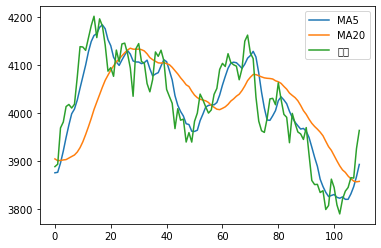

In [11]:
gzlc_x=MAa
gzlc_y=MAb
# 使用pandas.DataFrame.plot方法画折线图
df_plot=df_index[df_index['日期']>=datetime.strptime('2023-01-01', "%Y-%m-%d").date()]
# 2013,2018,2022,2023
df_plot=df_plot.reset_index(drop=True) #重新排列索引
df_plot=df_plot.dropna(subset=[gzlc_x,gzlc_y])
ax = df_plot[[gzlc_x,gzlc_y,'指数']].plot(kind='line')
# plt.hlines(secondary_y=0, xmin=0, xmax=len(df_plot))
plt.show()

In [12]:
A=[]
B=[]
df_index_time=df_index_chance[df_index_chance['日期']>=datetime.strptime('2018-01-01', "%Y-%m-%d").date()]
for i in tqdm.trange(len(df_index_time)-1):
    if df_index_time.iloc[i]['chance']==1:
        A.append(df_index_time.iloc[i]['日均收益率'])
    elif df_index_time.iloc[i]['chance']==-1:
        B.append(df_index_time.iloc[i]['日均收益率'])

100%|██████████| 84/84 [00:00<00:00, 2703.22it/s]


正态性检验

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

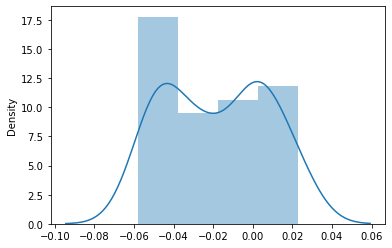

In [13]:
sns.distplot(B)

In [14]:
# k-test
u = np.mean(A)  # 计算均值
std = np.std(A)  # 计算标准差
print('A:',stats.kstest(A, 'norm', (u, std)))

u = np.mean(B)  # 计算均值
std = np.std(B)  # 计算标准差
stats.kstest(B, 'norm', (u, std))
print('B:',stats.kstest(B, 'norm', (u, std)))

A: KstestResult(statistic=0.13345607114279812, pvalue=0.4072793228331735, statistic_location=-0.2484543117856435, statistic_sign=-1)
B: KstestResult(statistic=0.16115745487008448, pvalue=0.20221039828430443, statistic_location=-0.002385007139354601, statistic_sign=-1)


In [15]:
# stats.normaltest
statistic, p_value = scipy.stats.normaltest (A, axis=0)
print('A - 统计量：', statistic)
print('A - P值：', p_value)
if p_value>0.05:
    print('A服从正态分布')
else:
    print('A不服从正态分布')

statistic, p_value = scipy.stats.normaltest (B, axis=0)
print('B - 统计量：', statistic)
print('B - P值：', p_value)
if p_value>0.05:
    print('B服从正态分布')
else:
    print('B不服从正态分布')

A - 统计量： 2.775889403363547
A - P值： 0.249587755125315
A服从正态分布
B - 统计量： 19.383234324146287
B - P值： 6.17993839452892e-05
B不服从正态分布


符合正态性检验用T检验或者Z检验，否则使用秩和检验。

In [21]:
import statsmodels.stats.weightstats as sw #单样本和双样本的z检验都是用该函数
t,p=sw.ztest(A,B,value=0,alternative="larger")#{“two-sided”, larger, smaller}
print("z值={},p值={}".format(t,p))

z值=-3.7041190788371785,p值=0.9998939366992744


In [22]:
# print(len(A),len(B))

In [23]:
# 如果A和B不一样长度，需要提出末尾的数据
# A_1=A[:-1]
# B_1=B[:-1]
# print(len(A_1),len(B))
# print(len(A),len(B_1))

In [24]:
# scipy.stats.wilcoxon( A, B, correction = False, alternative = 'greater' ) #{“two-sided”, “greater”, “less”}

In [25]:
# t_statistic, p_value = stats.ttest_ind(A, B)
# print('T统计量：', t_statistic)
# print('P值：', p_value)
# if p_value>0.05:
#     print('无显著差异')
# else:
#     print('有显著差异')

结果表明，均线MA（5,20）策略又有“反向操作”之嫌。

TODO：均线买入+（均线卖出or首次下跌卖出or盈利达到预期卖出）策略效果